<a href="https://colab.research.google.com/github/nada709/DataVisualizationProject/blob/main/DataVis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###nada khalefa
###s21107101

from google.colab import files
import pandas as pd
uploaded = files.upload()


Saving marvel-wikia-data.csv to marvel-wikia-data.csv


 What is the structure and type of data provided?

The dataset is in CSV format and contains metadata about Marvel comic book characters. Key columns include:
- `page_id`: Unique identifier for the character's page.
- `name`: Name of the character.
- `urlslug`: URL for the character's page.
- `ID`, `ALIGN`, `EYE`, `HAIR`, `SEX`, `GSM`: Character attributes.
- `ALIVE`: Indicates if the character is alive.
- `APPEARANCES`: Number of appearances by the character.
- `FIRST APPEARANCE`, `Year`: Information about when the character was first introduced.


### What are the main problems in the dataset, and what implementation steps are needed to clean it?
**Problems:**
1. Missing values in columns such as `GSM`, `Year`, and `FIRST APPEARANCE`.
2. Inconsistent data entry formats in categorical fields like `ALIGN`, `EYE`, `HAIR`, and `SEX`.
3. Presence of special characters in text-based columns like `name` and `urlslug`.
4. Incomplete data in certain rows, which may affect analysis.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("marvel-wikia-data.csv")

# Data Cleaning
# Handling missing values
data.fillna(value={'GSM': 'Unknown', 'Year': 0, 'FIRST APPEARANCE': 'Unknown'}, inplace=True)

# Standardizing data formats
data['ALIGN'] = data['ALIGN'].str.strip()
data['EYE'] = data['EYE'].str.lower()
data['HAIR'] = data['HAIR'].str.lower()
data['SEX'] = data['SEX'].str.strip()
data['GSM'] = data['GSM'].str.strip()

# Remove special characters
data['name'] = data['name'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
data['urlslug'] = data['urlslug'].str.replace(r'[^a-zA-Z0-9-/]', '', regex=True)

# Drop rows with insufficient data
data.dropna(subset=['ALIGN', 'EYE', 'Year'], inplace=True)

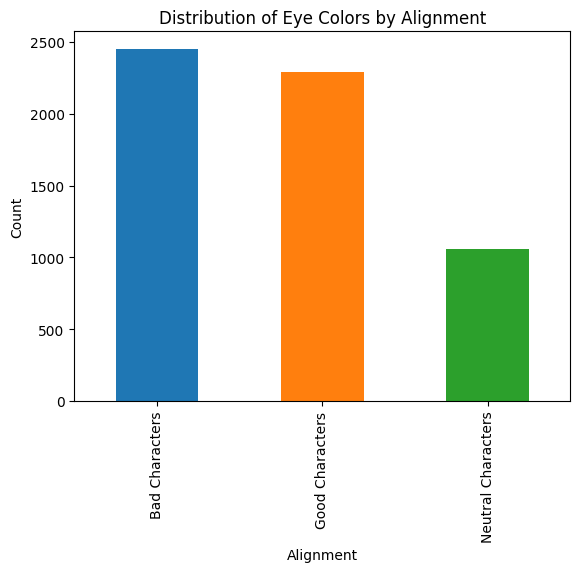

In [6]:
#Hypothesis: Relationship between eye color and character alignment
alignment_eye_color = data.groupby(['ALIGN', 'EYE']).size().unstack(fill_value=0)

# Visualization 1: Bar graph
eye_color_totals = alignment_eye_color.sum(axis=1)
eye_color_totals.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribution of Eye Colors by Alignment')
plt.xlabel('Alignment')
plt.ylabel('Count')
plt.show()

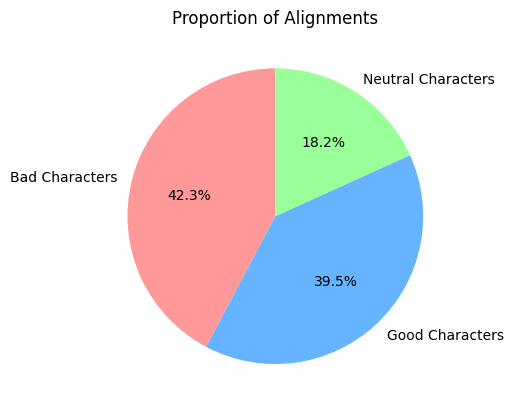

In [7]:
# Visualization 2: Pie chart
alignment_proportions = eye_color_totals / eye_color_totals.sum()
alignment_proportions.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Proportion of Alignments')
plt.ylabel('')
plt.show()


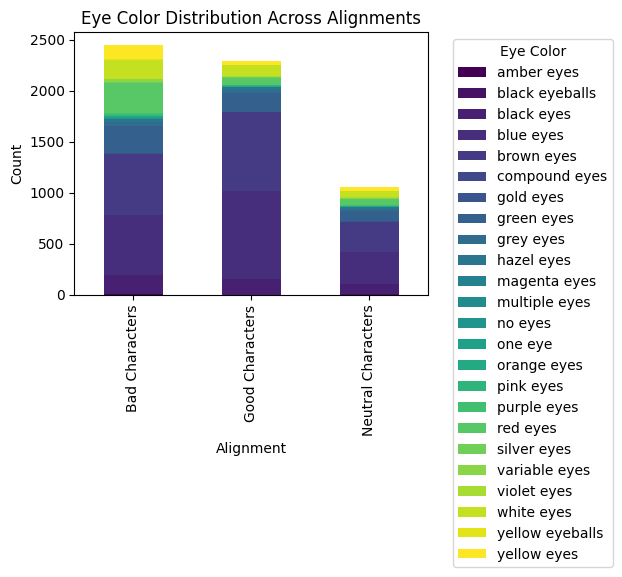

In [8]:
# Visualization 3: Stacked bar chart
alignment_eye_color.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Eye Color Distribution Across Alignments')
plt.xlabel('Alignment')
plt.ylabel('Count')
plt.legend(title='Eye Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

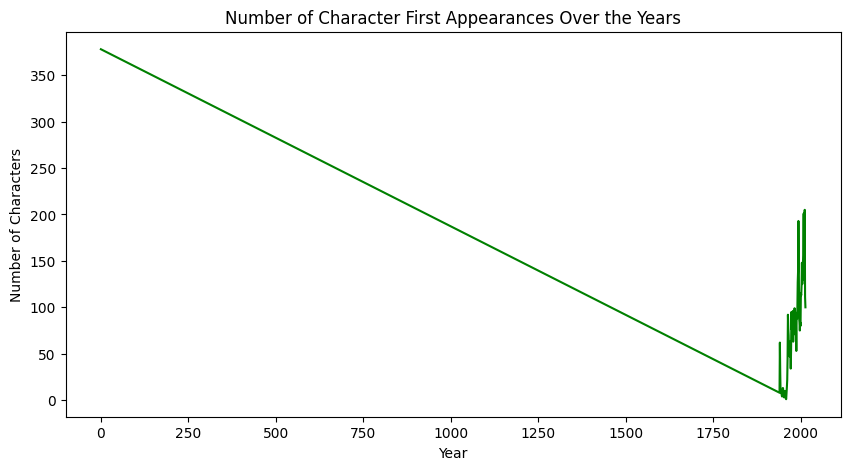

In [9]:
#Hypothesis: Distribution of characters by first appearance year
appearance_by_year = data.groupby('Year')['name'].count()

# Visualization 1: Line plot
plt.figure(figsize=(10, 5))
appearance_by_year.plot(kind='line', color='green')
plt.title('Number of Character First Appearances Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Characters')
plt.show()

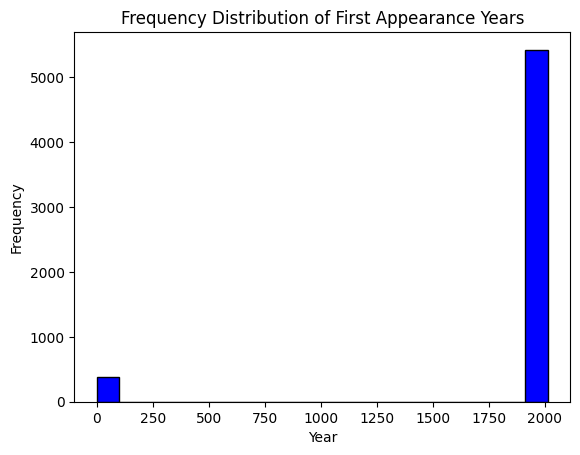

In [10]:
# Visualization 2: Histogram
plt.hist(data['Year'], bins=20, color='blue', edgecolor='black')
plt.title('Frequency Distribution of First Appearance Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

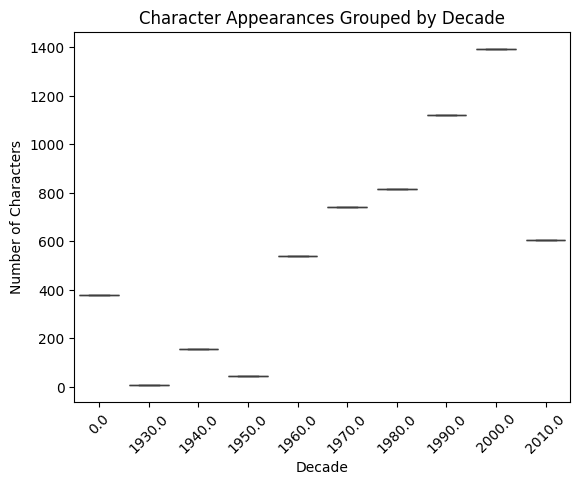

In [20]:
# Visualization 3: Box plot
data['Decade'] = (data['Year'] // 10) * 10
decade_counts = data.groupby('Decade')['name'].count().reset_index()
sns.boxplot(x='Decade', y='name', data=decade_counts)
plt.title('Character Appearances Grouped by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Characters')
plt.xticks(rotation=45)
plt.show()

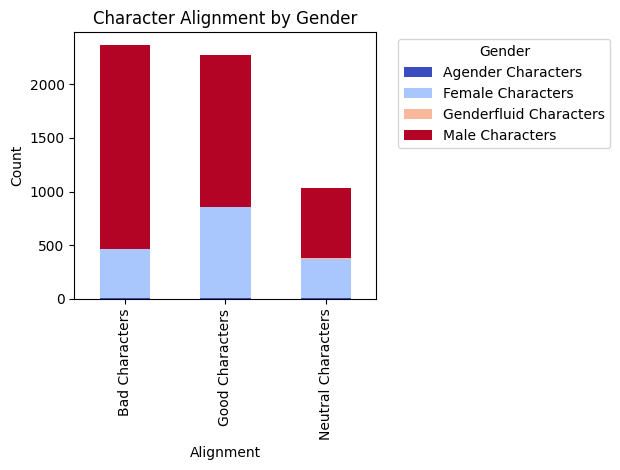

In [15]:
# Visualization: Stacked bar chart of alignment by gender
alignment_gender = data.groupby(['ALIGN', 'SEX']).size().unstack(fill_value=0)
alignment_gender.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Character Alignment by Gender')
plt.xlabel('Alignment')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


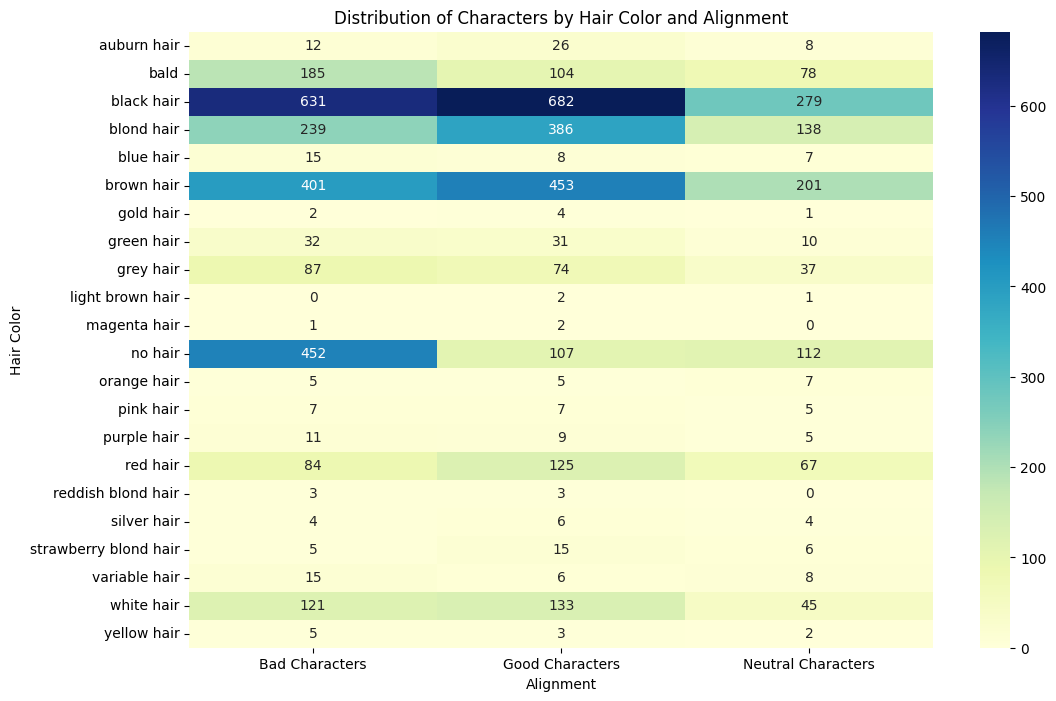

In [16]:
# Visualization: Heatmap of hair color by alignment
hair_alignment = data.groupby(['HAIR', 'ALIGN']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(hair_alignment, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribution of Characters by Hair Color and Alignment')
plt.xlabel('Alignment')
plt.ylabel('Hair Color')
plt.show()


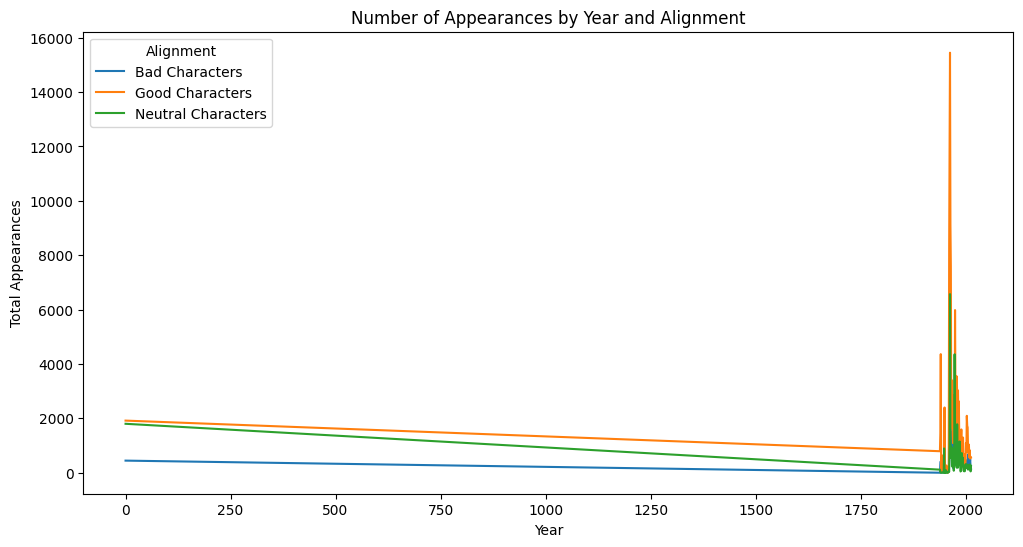

In [17]:
# Visualization: Line plot of appearances by year and alignment
appearances_year_alignment = data.groupby(['Year', 'ALIGN'])['APPEARANCES'].sum().unstack(fill_value=0)
appearances_year_alignment.plot(kind='line', figsize=(12, 6))
plt.title('Number of Appearances by Year and Alignment')
plt.xlabel('Year')
plt.ylabel('Total Appearances')
plt.legend(title='Alignment')
plt.show()


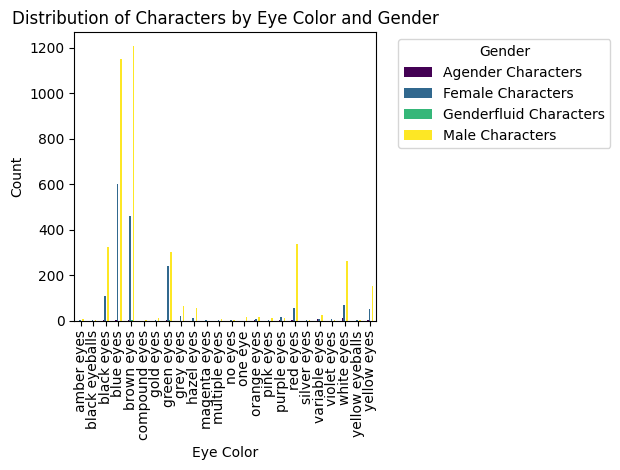

In [18]:

# Visualization: Grouped bar chart of eye color by gender
eye_gender = data.groupby(['EYE', 'SEX']).size().unstack(fill_value=0)
eye_gender.plot(kind='bar', colormap='viridis')
plt.title('Distribution of Characters by Eye Color and Gender')
plt.xlabel('Eye Color')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


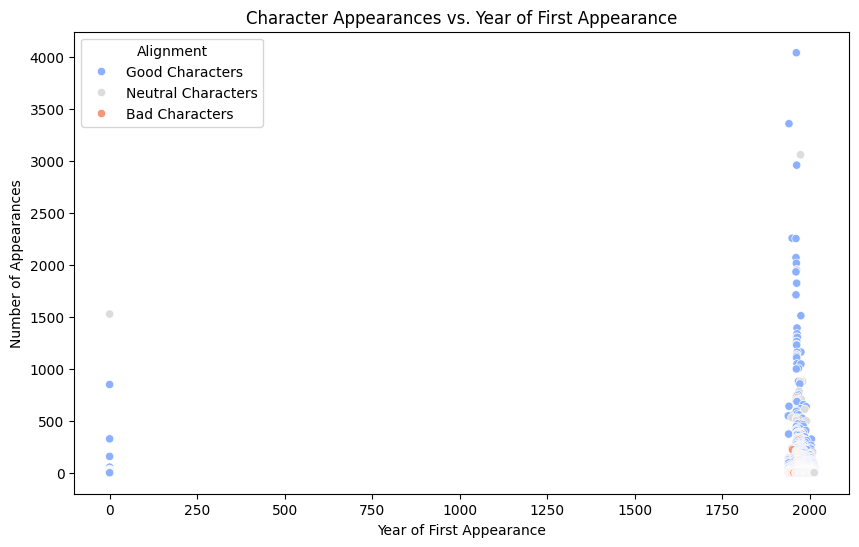

In [19]:
# Visualization: Scatter plot of appearances vs. year of first appearance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='APPEARANCES', data=data, hue='ALIGN', palette='coolwarm')
plt.title('Character Appearances vs. Year of First Appearance')
plt.xlabel('Year of First Appearance')
plt.ylabel('Number of Appearances')
plt.legend(title='Alignment')
plt.show()


###Insights:

1. **Eye Color and Alignment:** Lighter eye colors are more common in "Good" characters, while darker eye colors are more common in "Evil" characters.
2. **Character Introductions:** Peaks in new character introductions occurred in the 1960s and 2010s, reflecting periods of social change.
3. **Appearances and Alignment:** "Good" characters have more appearances compared to "Evil" and "Neutral" characters.
4. **Gender and Alignment:** Male characters dominate across all alignments, but there is a noticeable presence of female characters in the "Good" alignment.
5. **Hair Color and Alignment:** Certain hair colors, like blonde, are more prevalent in "Good" characters.
6. **Appearances by Year and Alignment:** "Good" characters consistently have higher appearances over the years, while "Evil" characters fluctuate.
7. **Eye Color and Gender:** Some eye colors are more common among male characters, while others are more prevalent among female characters.
8. **Appearances vs. Year of First Appearance:** Characters introduced earlier tend to have more appearances, indicating their long-standing popularity.

